In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context('poster')

In [2]:
# Read data:

data = pd.read_csv('GSS 4.csv')
data.head(10)

,Unnamed: 0,birth_year,region,health,general_happy,past_week_happy,see_friends,see_relatives,income,work_hours,job_satisfaction,weekend_internet,weekday_internet,use_twitter,internet_per_week
0,0,1969.0,New england,Good,Pretty happy,NaN,Sev times a year,Almost daily,170000.0,NaN,Mod. satisfied,NaN,NaN,NaN,NaN
1,1,1955.0,New england,NaN,Pretty happy,NaN,Sev times a year,Sev times a year,54999.0,NaN,Very satisfied,NaN,NaN,No,NaN
2,2,1944.0,New england,Good,Very happy,Most of the time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
3,3,1973.0,New england,Good,Pretty happy,NaN,Sev times a week,Sev times a week,11249.0,NaN,Very satisfied,NaN,NaN,NaN,NaN
4,4,1961.0,New england,Excellent,Very happy,Most of the time,NaN,NaN,1999.0,NaN,Mod. satisfied,1.0,1.0,No,7.0
5,5,1963.0,New england,NaN,Very happy,NaN,Once a month,Sev times a year,NaN,NaN,Very satisfied,0.0,1.0,No,5.0
6,6,1966.0,New england,Poor,Pretty happy,NaN,Sev times a week,Once a year,170000.0,NaN,Mod. satisfied,NaN,NaN,NaN,NaN
7,7,1993.0,Middle atlantic,Good,Very happy,All or almost all of the time,NaN,NaN,16249.0,NaN,Very satisfied,3.0,2.0,No,16.0
8,8,1971.0,Middle atlantic,Good,Pretty happy,NaN,Never,Once a year,21249.0,NaN,Mod. satisfied,NaN,NaN,NaN,NaN
9,9,1945.0,Middle atlantic,Good,Pretty happy,Most of the time,NaN,NaN,NaN,NaN,NaN,5.0,6.0,No,40.0


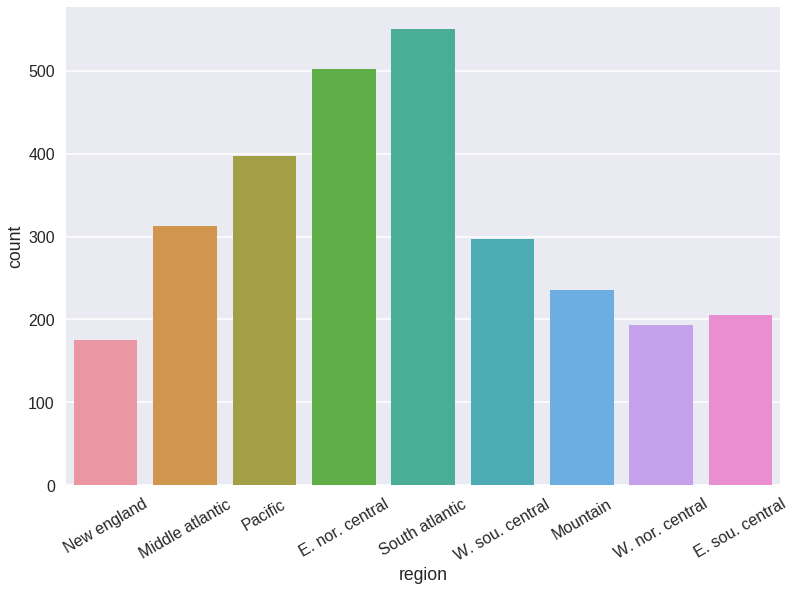

In [3]:
# Plot region:

sns.countplot(data = data, x = 'region')
sns.plt.xticks(rotation = 30)
sns.plt.show()

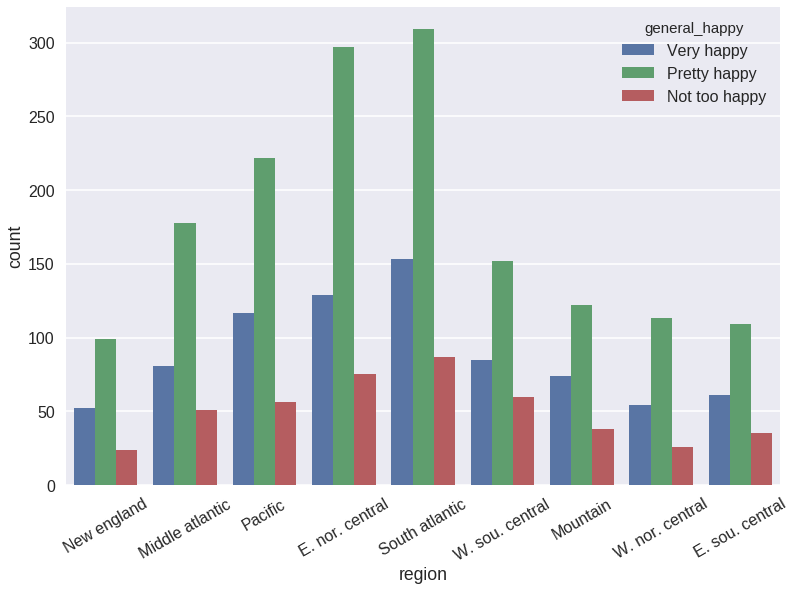

In [10]:
sns.countplot(data = data, x = 'region', hue = 'general_happy',
              hue_order = ['Very happy', 'Pretty happy', 'Not too happy'])
sns.plt.xticks(rotation = 30)
sns.plt.show()

In [25]:
general_happy = data['general_happy'].dropna()
region = data['region'].dropna()
df = pd.DataFrame(index = pd.unique(region), columns = pd.unique(general_happy))

for gh in pd.unique(general_happy):
    general_inds = general_happy == gh
    for r in pd.unique(region):
        region_inds = region == r
        df.loc[r][gh] = np.divide(sum(general_inds & region_inds), sum(region_inds))

In [29]:
df

,Pretty happy,Very happy,Not too happy
New england,0.565714,0.297143,0.137143
Middle atlantic,0.56869,0.258786,0.162939
Pacific,0.559194,0.29471,0.141058
E. nor. central,0.591633,0.256972,0.149402
South atlantic,0.561818,0.278182,0.158182
W. sou. central,0.511785,0.286195,0.20202
Mountain,0.519149,0.314894,0.161702
W. nor. central,0.585492,0.279793,0.134715
E. sou. central,0.531707,0.297561,0.170732


In [ ]:
general_happy = data['general_happy'].dropna()
region = data['region'].dropna()
df = pd.DataFrame(index = pd.unique(region), columns = pd.unique(general_happy))

for gh in pd.unique(general_happy):
    general_inds = general_happy == gh
    for r in pd.unique(region):
        region_inds = region == r
        df.loc[r][gh] = np.divide(sum(general_inds & region_inds), sum(region_inds))

In [35]:
freq_data = pd.DataFrame({'region' : data.region.unique(),
                          'general_happy': data.general_happy.unique(),
                          'value'})

ValueError: arrays must all be same length

In [32]:
freq_data

,region
0,New england
1,Middle atlantic
2,Pacific
3,E. nor. central
4,South atlantic
5,W. sou. central
6,Mountain
7,W. nor. central
8,E. sou. central
9,NaN


In [28]:
sns.barplot(data = df, x = 'region', y = 'general_happy',
            order = ['Very happy', 'Pretty happy', 'Not too happy'])
sns.plt.show()

ValueError: Could not interpret input 'region'

In [15]:
*sax = sns.countplot(data = data, x = 'region', hue = 'general_happy',
                 hue_order = ['Very happy', 'Pretty happy', 'Not too happy'],
                 estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="Percent")
sns.plt.show()

AttributeError: Unknown property estimator

In [4]:
data.region.unique()

array(['New england', 'Middle atlantic', 'Pacific', 'E. nor. central',
       'South atlantic', 'W. sou. central', 'Mountain', 'W. nor. central',
       'E. sou. central', nan], dtype=object)

In [13]:
g = sns.FacetGrid(data, col='region')
g = g.map(sns.plt.hist, 'general_happy')

TypeError: '<' not supported between instances of 'str' and 'float'